En el archivo crime_data.csv se encuentra el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación.

Segmenta este conjunto de datos utilizando k-means y obtén los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.

In [4]:
# Preparamos el entorno
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# importamos las librerias
import pandas as pd  # Python Data Analysis Library

# Leemos el fichero
crime_df = pd.DataFrame.from_csv('crime_data.csv', sep=',', header = 0)

print(crime_df.describe())
print(crime_df.head())

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000
            Murder  Assault  UrbanPop  Rape
State                                      
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


[0.592655441935794, 0.5319024108339816, 0.50123323708914957, 0.44929501828815677, 0.44994809798886382, 0.43595395427309031, 0.45335935971985319, 0.42642642708666434, 0.4113862166386742, 0.40423850137216211, 0.39148602880787003, 0.39016719792963755, 0.38072539568934793]


Text(0.5,1,'Crime')

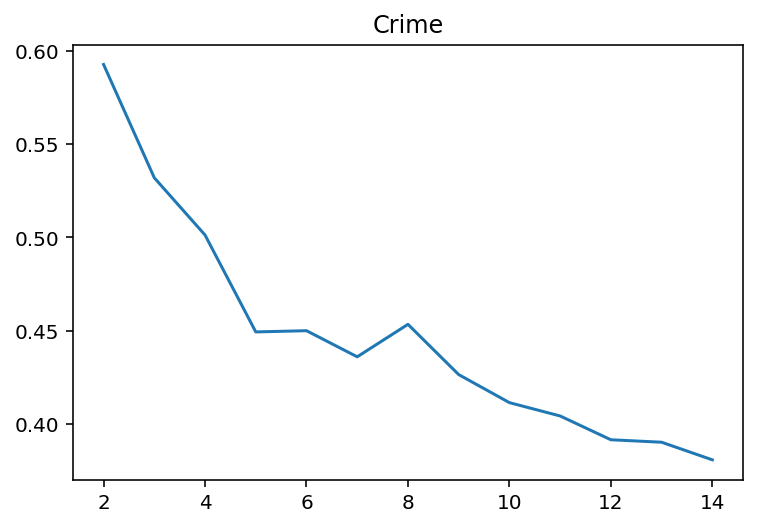

In [5]:
# En primer lugar es necesario buscar el numero de clusteres
# Usamos el metodo de la Silhouette: Buscamos el valor maximo de las distancias aplicando iterativamente K-Means
# para tener el numero de clusteres optimo
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Silhouette_Crime_dist =[]
Max_Clusters = 15

for numClus in range(2, Max_Clusters):
    kmean = KMeans(n_clusters = numClus, random_state = 1).fit(crime_df)
    Silhouette_Crime_dist.append(silhouette_score(crime_df, kmean.labels_))

print(Silhouette_Crime_dist)
plot(range(2, Max_Clusters), Silhouette_Crime_dist)
title('Crime')

Se observa que el maximo se alcanza con 2 clusters.

Elementos en cada cluster:
-------------------------------------------------------------------------
Cluster 0
Index(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri',
       'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')
Cluster 1
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Delaware', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina', 'Tennessee', 'Texas'],
      dtype='object', name='State')
-------------------------------------------------------------------------
Centroides:
---------------------------

Text(0.5,1,'Crime K-Means y centroides')

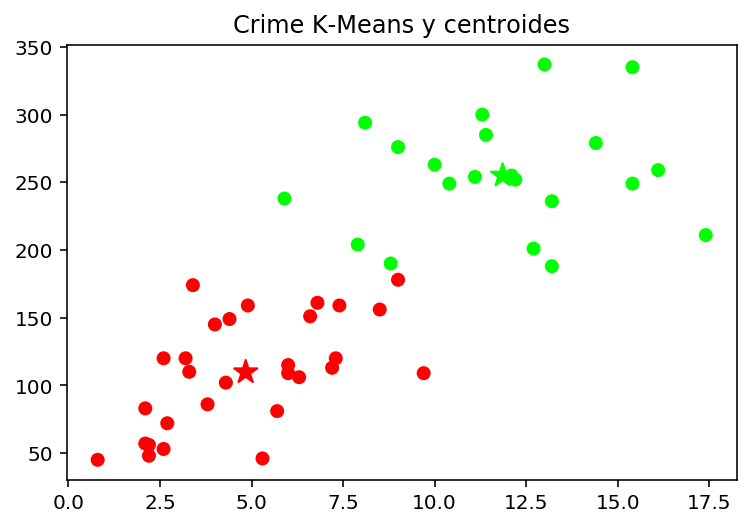

In [18]:
# Ejecutamos la clusterizacion y graficamos
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Clusterizacion
# NOTA: Se podria buscar de forma automatica el indice con maximo de indice Silhouette
Kmean_Crime = KMeans(n_clusters = 2, random_state = 1).fit(crime_df)
Kmean_CrimeClusters = Kmean_Crime.predict(crime_df)

print('Elementos en cada cluster:')
print('-------------------------------------------------------------------------')
for i in range(0, max(Kmean_CrimeClusters) + 1):
    print ("Cluster", i)
    print (crime_df.index[Kmean_CrimeClusters == i])

# Graficamos los clusteres y sus centros
# Dibujamos los elementos de cada cluster
# Es necesario transformarlo en array para poder trabajar con scatter:
X = np.asarray(crime_df)
# print(X)
mapa_color = ListedColormap(['#FF0000', '#00FF00'])
scatter(X[:, 0], X[:, 1],c=Kmean_CrimeClusters, cmap = mapa_color)

# Centros
print('-------------------------------------------------------------------------')
print('Centroides:')
print('-------------------------------------------------------------------------')
print(Kmean_Crime.cluster_centers_)
scatter(Kmean_Crime.cluster_centers_[:, 0], Kmean_Crime.cluster_centers_[:, 1], 
        c=[0,1], cmap = mapa_color, marker='*', s= 150)
title('Crime K-Means y centroides')